In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove6b300dtxt/glove.6B.300d.txt
/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [55]:
import warnings
warnings.filterwarnings('ignore')

# Modules for data manipulation
import numpy as np
import pandas as pd
import re

# Modules for visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Tools for preprocessing input data
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Tools for creating ngrams and vectorizing input data
from gensim.models import Word2Vec, Phrases

# Tools for building a model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences

# Tools for assessing the quality of model prediction
from sklearn.metrics import accuracy_score, confusion_matrix

import os
from keras.datasets import imdb
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
from keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
data  =pd.read_csv( '../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [57]:
#sentiment count
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [58]:
#mapping 
from sklearn import preprocessing 
label_enc  = preprocessing.LabelEncoder()
data['sentiment'] = label_enc.fit_transform(data['sentiment'])
labels = data['sentiment']
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


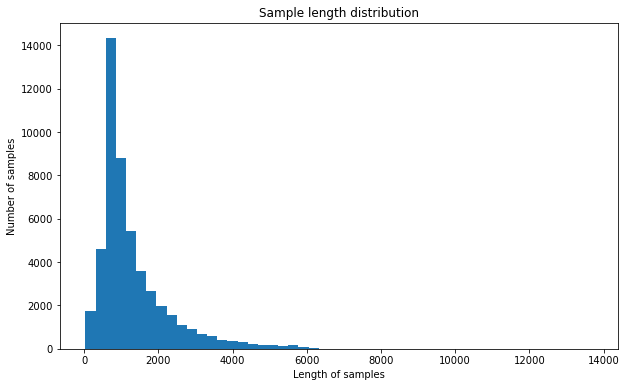

In [59]:
# Now, let's see the average number of words per sample
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(data['review'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [60]:
x_data = data['review']
y_data = data['sentiment']

In [61]:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

***Cleaning the data***

In [62]:
data.review.apply(lambda x: clean_text(x))

0        one reviewer ha mention watch 1 oz episode you...
1        wonderful little production br br film techniq...
2        think wa wonderful way spend time hot summer w...
3        basically family little boy jake think zombie ...
4        petter matteis love time money visually stun f...
                               ...                        
49995    think movie right good job wasnt creative orig...
49996    bad plot bad dialogue bad act idiotic direct a...
49997    catholic teach parochial elementary school nun...
49998    im go disagree previous comment side maltin on...
49999    one expect star trek movie high art fan expect...
Name: review, Length: 50000, dtype: object

In [63]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

In [64]:
#set stopwords to english
stop=set(stopwords.words('english'))
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

In [65]:
texts = data['review']

In [66]:
#split the dataset  
#train dataset
train_reviews=data.review[:40000]
train_sentiments=data.sentiment[:40000]
#test dataset
test_reviews=data.review[40000:]
test_sentiments=data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [13]:
#start by using bag of words module by using keras 
vocab_sz = 10000
tok = Tokenizer(num_words = vocab_sz,oov_token='UNK')
tok.fit_on_texts(data['review'])

In [14]:
#extract binary bag of words
x_train = tok.texts_to_matrix(train_reviews, mode='binary')
x_test = tok.texts_to_matrix(test_reviews, mode='binary')
y_train = np.asarray(train_sentiments).astype('float32')
y_test = np.asarray(test_sentiments).astype('float32')


In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)


In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
47/47 [==============================] - 2s 36ms/step - loss: 0.4380 - binary_accuracy: 0.8418 - val_loss: 0.3250 - val_binary_accuracy: 0.8794
Epoch 2/20
47/47 [==============================] - 1s 18ms/step - loss: 0.2491 - binary_accuracy: 0.9145 - val_loss: 0.2752 - val_binary_accuracy: 0.8916
Epoch 3/20
47/47 [==============================] - 1s 18ms/step - loss: 0.1888 - binary_accuracy: 0.9332 - val_loss: 0.2742 - val_binary_accuracy: 0.8902
Epoch 4/20
47/47 [==============================] - 1s 18ms/step - loss: 0.1532 - binary_accuracy: 0.9462 - val_loss: 0.2943 - val_binary_accuracy: 0.8873
Epoch 5/20
47/47 [==============================] - 1s 18ms/step - loss: 0.1276 - binary_accuracy: 0.9575 - val_loss: 0.3148 - val_binary_accuracy: 0.8841
Epoch 6/20
47/47 [==============================] - 1s 18ms/step - loss: 0.1066 - binary_accuracy: 0.9650 - val_loss: 0.3447 - val_binary_accuracy: 0.8806
Epoch 7/20
47/47 [==============================] - 1s 23ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

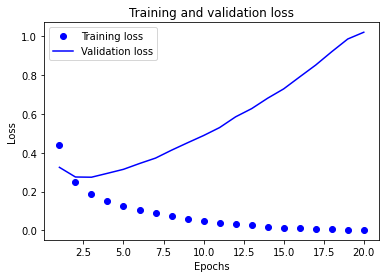

In [18]:

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
norm_test_reviews=data.review[40000:]
norm_test_reviews[40000+4]

'movie tv day didnt enjoy first George jungle good comedy sequel completely awful new actor actress play lead roles werent good original actor Brendon Fraiser original actress forgot name movie gets 0 ten rating film sit watch enjoy film turn another channel take back shop hired bought good see Ape ape back wasnt fun first new George Georges son grown still Bredon whats face film wouldve bit better'

In [20]:
'''
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)
'''
# Extract binary BoW features
x_train = tok.texts_to_matrix(train_reviews, mode='tfidf')
x_test = tok.texts_to_matrix(test_reviews, mode='tfidf')
y_train = np.asarray(train_sentiments).astype('float32')
y_test = np.asarray(test_sentiments).astype('float32')


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)


In [21]:
x_train[1].shape

(10000,)

In [22]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
47/47 [==============================] - 2s 35ms/step - loss: 0.4021 - binary_accuracy: 0.8292 - val_loss: 0.2910 - val_binary_accuracy: 0.8851
Epoch 2/20
47/47 [==============================] - 1s 19ms/step - loss: 0.2045 - binary_accuracy: 0.9267 - val_loss: 0.2979 - val_binary_accuracy: 0.8837
Epoch 3/20
47/47 [==============================] - 1s 18ms/step - loss: 0.1411 - binary_accuracy: 0.9505 - val_loss: 0.3149 - val_binary_accuracy: 0.8817
Epoch 4/20
47/47 [==============================] - 1s 21ms/step - loss: 0.0990 - binary_accuracy: 0.9668 - val_loss: 0.3581 - val_binary_accuracy: 0.8770
Epoch 5/20
47/47 [==============================] - 1s 21ms/step - loss: 0.0683 - binary_accuracy: 0.9783 - val_loss: 0.4098 - val_binary_accuracy: 0.8766
Epoch 6/20
47/47 [==============================] - 1s 20ms/step - loss: 0.0481 - binary_accuracy: 0.9862 - val_loss: 0.4731 - val_binary_accuracy: 0.8721
Epoch 7/20
47/47 [==============================] - 1s 18ms/step - los

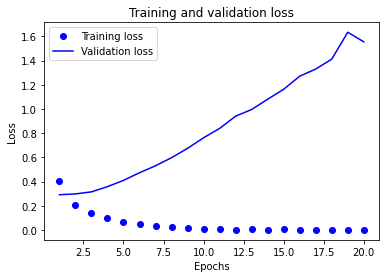

In [23]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

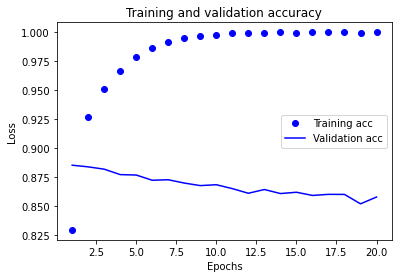

In [24]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
#by using Embedding layers
max_len = 50
from keras.layers import Embedding
e = Embedding(10000, 32, input_length=max_len)

In [45]:
easd = data['review'][0]
len(seq[0])

171

In [27]:
#new ideas
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


In [28]:
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


In [33]:
from keras.datasets import imdb
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [36]:
x_train.shape

(25000, 20)

In [32]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6715 - acc: 0.6169 - val_loss: 0.6214 - val_acc: 0.6978
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5425 - acc: 0.7516 - val_loss: 0.5254 - val_acc: 0.7352
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4609 - acc: 0.7883 - val_loss: 0.5010 - val_acc: 0.7504
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4219 - acc: 0.8086 - val_loss: 0.4957 - val_acc: 0.7532
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3960 - acc: 0.8228 - val_loss: 0.4981 - val_acc: 0.7552
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3746 - acc: 0.8354 - val_loss: 0.5008 - val_acc: 0.7594
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3556 - acc: 0.8466 - val_loss: 0.5046 - val_acc: 0.7584
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

In [15]:
#by using glove embedding loading all embedding pakage into meomory
#loop for all words in the dataset and compare each word to the embedding matrix
import numpy as np
embeddings_index = dict()
f = open('../input/glove6b300dtxt/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


#new GLOVE****

In [ ]:
#i have 300 dimensional in glove

In [44]:
#tokenizing the data
maxlen = 300
training_samples = 200
validation_samples = 10000
max_words = 10000
#######################
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [45]:
data['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [107]:

vocab_size = 10000
(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=vocab_size)

y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')


max_length = 300
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_val = pad_sequences(x_val, maxlen=max_length, padding='post')


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [108]:
x_test

40000    First want say lean liberal political scale fo...
40001    excited see sitcom would hopefully represent I...
40002    look cover read stuff entirely different type ...
40003    Like many others counted appearance Dennis Hop...
40004    movie tv day didnt enjoy first George jungle g...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    Catholic taught parochial elementary schools n...
49998    Im going disagree previous comment side Maltin...
49999    one expects Star Trek movies high art fans exp...
Name: review, Length: 10000, dtype: object

In [109]:
x_val.shape

(10000, 300)

In [110]:
print(y_val.shape)
print(x_train.shape)

(10000,)
(15000, 300)


In [111]:
x_train.shape

(15000, 300)

In [112]:
indices.shape

(50000,)

In [115]:
embedding_dim = 300
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [116]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 90000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2880032   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 5,880,065
Trainable params: 5,880,065
Non-trainable params: 0
_________________________________________________________________


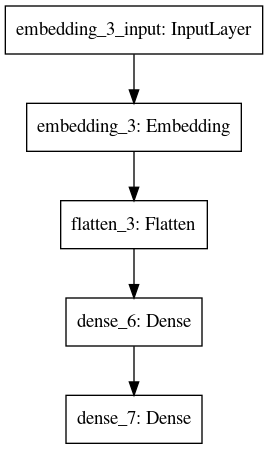

In [117]:
plot_model(model)

In [118]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 13s 427ms/step - loss: 0.7584 - binary_accuracy: 0.5743 - val_loss: 0.6013 - val_binary_accuracy: 0.6615
Epoch 2/20
30/30 [==============================] - 19s 623ms/step - loss: 0.4419 - binary_accuracy: 0.7921 - val_loss: 0.3933 - val_binary_accuracy: 0.8361
Epoch 3/20
30/30 [==============================] - 10s 338ms/step - loss: 0.2184 - binary_accuracy: 0.9163 - val_loss: 0.3374 - val_binary_accuracy: 0.8571
Epoch 4/20
30/30 [==============================] - 10s 339ms/step - loss: 0.1080 - binary_accuracy: 0.9652 - val_loss: 0.4140 - val_binary_accuracy: 0.8300
Epoch 5/20
30/30 [==============================] - 10s 334ms/step - loss: 0.0510 - binary_accuracy: 0.9863 - val_loss: 0.3756 - val_binary_accuracy: 0.8569
Epoch 6/20
30/30 [==============================] - 10s 334ms/step - loss: 0.0210 - binary_accuracy: 0.9940 - val_loss: 0.4117 - val_binary_accuracy: 0.8543
Epoch 7/20
30/30 [==============================] - 10s 34

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

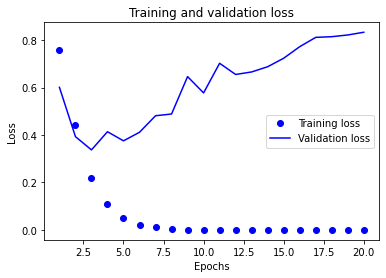

In [119]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

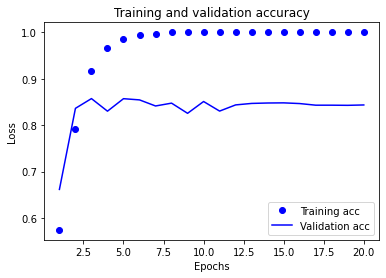

In [120]:

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [114]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [91]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
469/469 [==============================] - 12s 25ms/step - loss: 0.7057 - acc: 0.5077 - val_loss: 0.6913 - val_acc: 0.5135
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.6859 - acc: 0.5313 - val_loss: 0.6924 - val_acc: 0.5215
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.6596 - acc: 0.5773 - val_loss: 0.7104 - val_acc: 0.5247
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.6162 - acc: 0.6319 - val_loss: 0.7081 - val_acc: 0.5447
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 0.5754 - acc: 0.6825 - val_loss: 0.7390 - val_acc: 0.5504
Epoch 6/10
469/469 [==============================] - 11s 24ms/step - loss: 0.5180 - acc: 0.7339 - val_loss: 0.7331 - val_acc: 0.5609
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.4461 - acc: 0.7925 - val_loss: 0.8430 - val_acc: 0.5801
Epoch 8/10
469/469 [==============================] - 12s 25ms

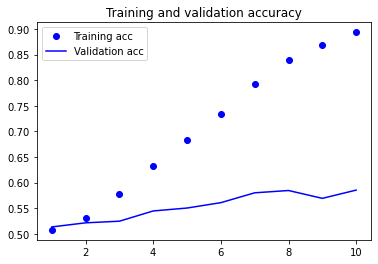

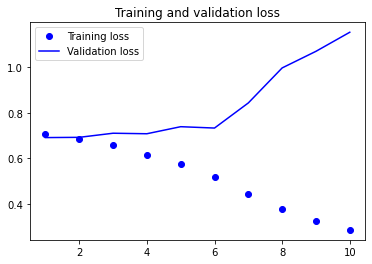

In [92]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()